<a href="https://colab.research.google.com/github/Lenakirara/Dados-pandas-01/blob/master/Pandas_aula02_DIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados com python e pandas

Fazer análise de dados a partir de planilhas de excel referentes às vendas de produtos em lojas localizadas em determinadas cidades.

In [1]:
import pandas as pd

In [3]:
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [5]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [6]:
# conatenando
df = pd.concat([df1,df2,df3,df4,df5])

In [7]:
# visualizar dataset
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [8]:
# visualizar finla do dataset
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [9]:
# amostra de 5 linhas
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
122,Aracaju,2018-01-01,38.49,1522,4
60,Aracaju,2018-01-01,215.88,1521,3
94,Fortaleza,2019-01-01,150.49,1003,5
24,Fortaleza,2019-01-01,35.38,1005,4
33,Aracaju,2018-01-01,35.09,1523,4


In [10]:
# visualizando tipos
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [11]:
# alterar tipo de dados 
df["LojaID"] = df["LojaID"].astype("object")

In [12]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

### valores faltantes (nulos)

In [13]:
# verificando valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

### Criar novas colunas

In [15]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [16]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [17]:
# retornando maior receita
df["Receita"].max()

3544.0

In [18]:
# menor receita
df["Receita"].min()

3.34

In [19]:
# nlargest - escolher o top 3 
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [20]:
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [21]:
# soma da receita por cidade (agrupar)
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [22]:
# odenar pela receita
df.sort_values("Receita",ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


## Trabalhando com datas

In [23]:
# mudar coluna data em int
df["Data"] = df["Data"].astype("int64")

In [24]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [25]:
# transformar coluna data em data
df["Data"] = pd.to_datetime(df["Data"])

In [26]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [27]:
# agrupar por ano 'dt.year'
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [28]:
# criando - nova coluna "ano_venda"
df["Ano_Venda"] = df["Data"].dt.year

In [29]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
124,Salvador,2019-03-02,44.82,1034,3,134.46,2019
105,Natal,2019-01-02,32.83,1037,1,32.83,2019
90,Natal,2019-01-02,100.54,1036,2,201.08,2019
178,Salvador,2019-01-02,39.28,1037,3,117.84,2019
26,Aracaju,2018-01-01,6.98,1521,10,69.80,2018


In [30]:
# extrair info - mês e dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [40]:
df.sample(4)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferença_dias,trimestre_venda
195,Natal,2019-01-02,44.89,1036,3,134.67,2019,1,2,366 days,1
102,Recife,2019-01-01,96.50,982,7,675.50,2019,1,1,365 days,1
130,Natal,2019-01-02,59.78,1036,1,59.78,2019,1,2,366 days,1
64,Aracaju,2018-01-01,21.00,1523,5,105.00,2018,1,1,0 days,1


In [32]:
# ver data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [33]:
# calculando # de dias
df["diferença_dias"] = df["Data"] - df["Data"].min()

In [34]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferença_dias
173,Natal,2019-01-02,31.77,1034,2,63.54,2019,1,2,366 days
137,Recife,2019-03-02,51.99,983,3,155.97,2019,3,2,425 days
138,Recife,2019-03-02,150.38,983,6,902.28,2019,3,2,425 days
80,Recife,2019-01-01,114.14,982,8,913.12,2019,1,1,365 days
159,Salvador,2019-01-02,172.52,1035,1,172.52,2019,1,2,366 days


In [35]:
# criando coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [36]:
df.sample(8)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferença_dias,trimestre_venda
16,Salvador,2019-01-01,32.47,1036,2,64.94,2019,1,1,365 days,1
112,Salvador,2019-03-02,43.00,1036,3,129.00,2019,3,2,425 days,1
217,Natal,2019-01-02,37.65,1036,2,75.30,2019,1,2,366 days,1
49,Aracaju,2018-01-01,53.74,1522,3,161.22,2018,1,1,0 days,1
167,Salvador,2019-01-02,36.42,1037,1,36.42,2019,1,2,366 days,1
26,Salvador,2019-01-01,183.45,1036,3,550.35,2019,1,1,365 days,1
62,Salvador,2019-01-01,161.02,1037,3,483.06,2019,1,1,365 days,1
117,Salvador,2019-03-02,39.41,1034,1,39.41,2019,3,2,425 days,1


In [37]:
# filtrar '.loc' vendas de 2019 e mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [41]:
# sample - puxando uma amostra
vendas_marco_19.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferença_dias,trimestre_venda
119,Recife,2019-03-02,152.30,982,7,1066.10,2019,3,2,425 days,1
130,Recife,2019-03-02,12.36,983,4,49.44,2019,3,2,425 days,1
18,Natal,2019-03-14,581.00,853,3,1743.00,2019,3,14,437 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
137,Fortaleza,2019-03-02,51.99,983,3,155.97,2019,3,2,425 days,1


## Visualizar gráficos

In [42]:
# contagem lojas
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

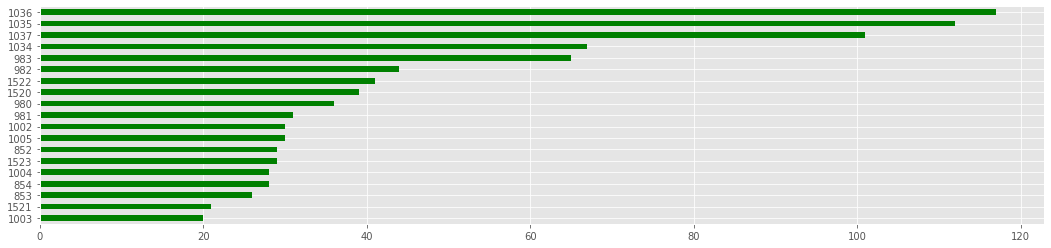

In [76]:
plt.figure(figsize=(18, 4))
df["LojaID"].value_counts(ascending=True).plot.barh(color='green');

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

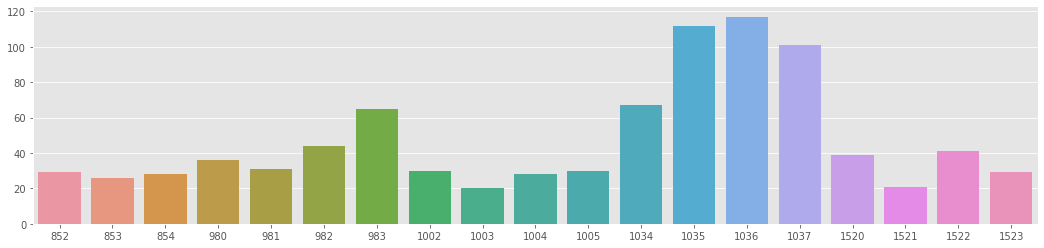

In [64]:
df_loja = df["LojaID"].value_counts(ascending=True)
plt.figure(figsize=(18, 4))
sns.barplot(x=df_loja.index,
            y=df_loja.values);

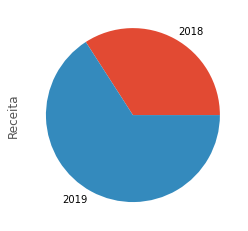

In [65]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

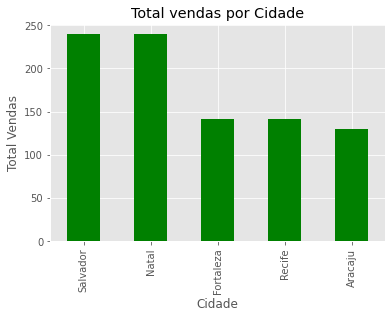

In [77]:
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color='green')
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [67]:
df["Cidade"].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

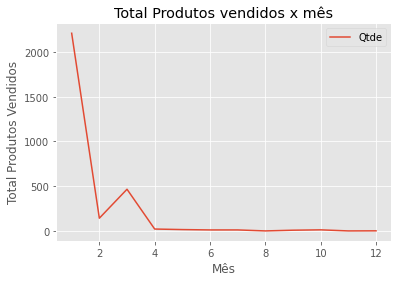

In [68]:
plt.style.use("ggplot")

df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [69]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [70]:
df_2019 = df[df["Ano_Venda"] == 2019]

In [71]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

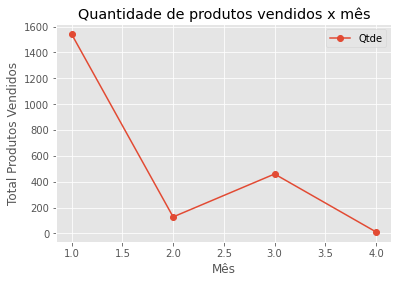

In [72]:
# grafico de venda x mes em 2019 - salvar en png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()
plt.savefig("grafico QTDE x MES.png");